# Part 1: Introduction to Machine Learning

## 1. What is Machine Learning?
  
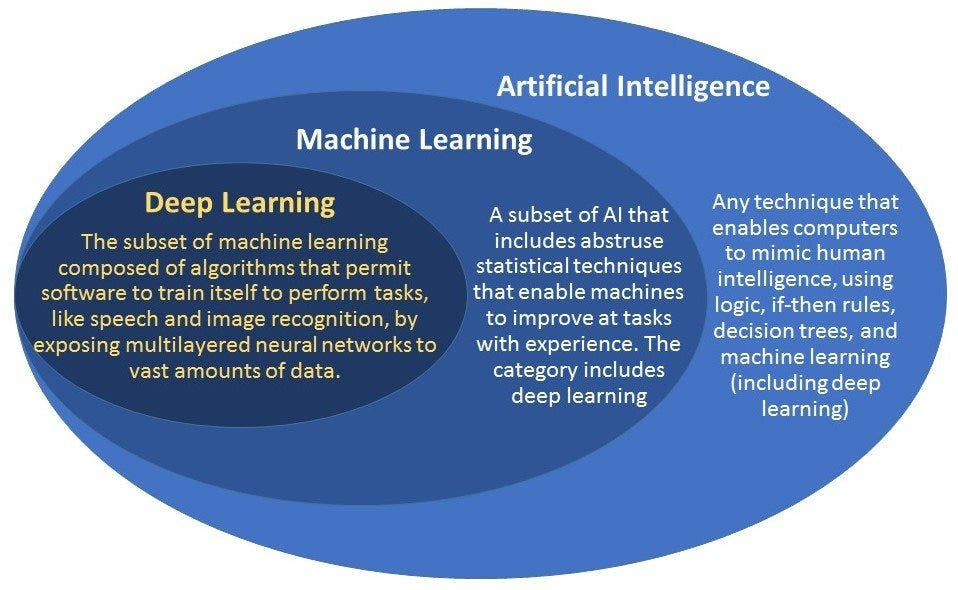

## Types of Data

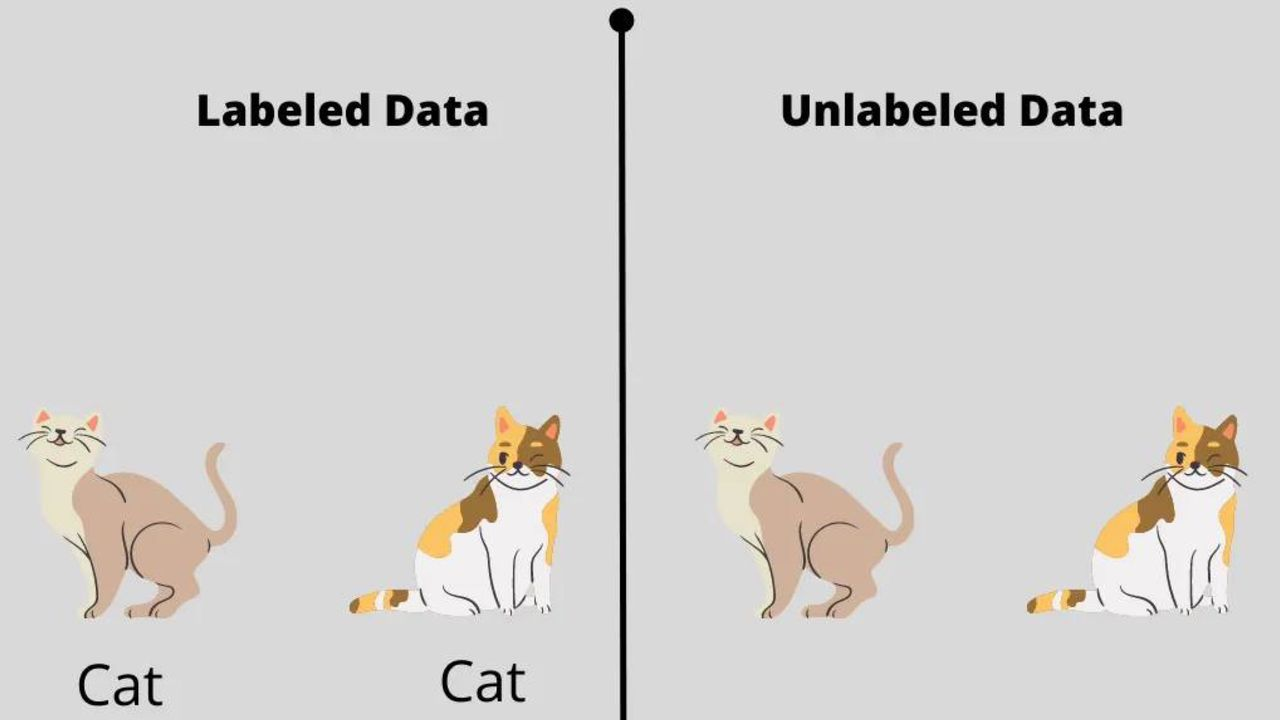

### Key concept
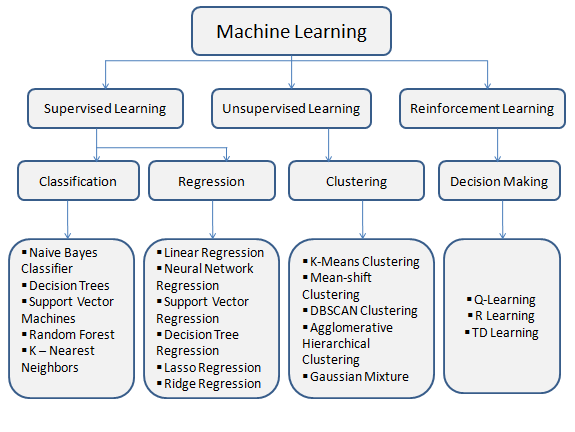sg)

<img src = "https://www.netguru.com/hs-fs/hubfs/ML_Infographic%201@2x.png?width=768&amp;height=320&amp;"/>
<img src = "https://www.netguru.com/hs-fs/hubfs/ML_Infographic%202@2x.png?width=700&amp;height=291&amp;name=ML_Infographic%202@2x.png"/><img src = "https://miro.medium.com/v2/resize:fit:1400/0*BTxqLfsdVcvw3399">


In [106]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

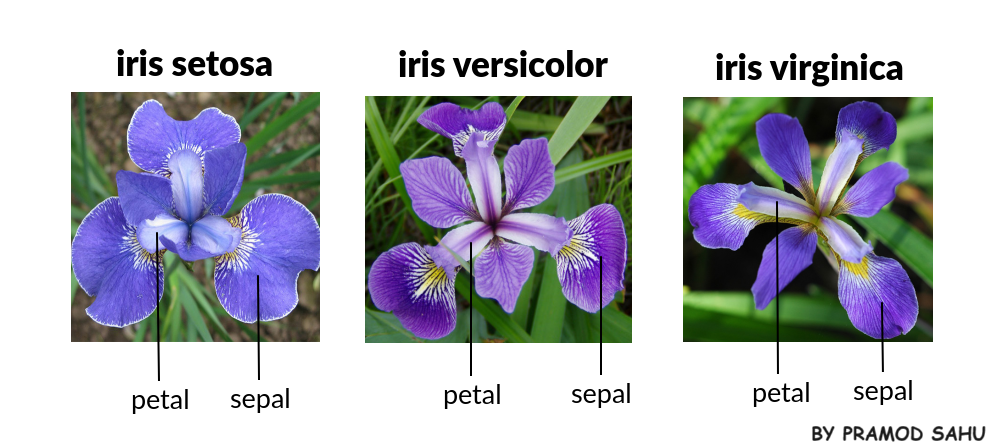

In [107]:
url = "https://gist.githubusercontent.com/curran/a08a1080b88344b0c8a7/raw/0e7a9b0a5d22642a06d3d5b9bcbad9890c8ee534/iris.csv"
data = pd.read_csv(url)
data.sample(10)

,sepal_length,sepal_width,petal_length,petal_width,species
50,7.0,3.2,4.7,1.4,versicolor
15,5.7,4.4,1.5,0.4,setosa
43,5.0,3.5,1.6,0.6,setosa
139,6.9,3.1,5.4,2.1,virginica
107,7.3,2.9,6.3,1.8,virginica
123,6.3,2.7,4.9,1.8,virginica
40,5.0,3.5,1.3,0.3,setosa
119,6.0,2.2,5.0,1.5,virginica
105,7.6,3.0,6.6,2.1,virginica
39,5.1,3.4,1.5,0.2,setosa


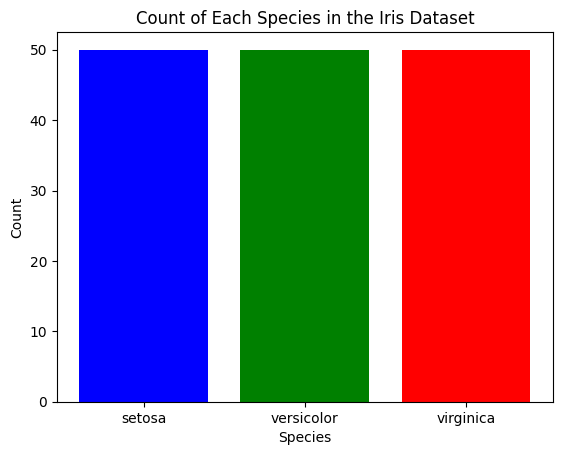

In [108]:
species_count = df['species'].value_counts()

plt.bar(species_count.index, species_count.values, color=['blue', 'green', 'red'])

plt.xlabel('Species')
plt.ylabel('Count')
plt.title('Count of Each Species in the Iris Dataset')

plt.show()

In [189]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, f1_score

In [110]:
X = data.drop(columns=['species'])
y = data['species']

In [111]:
x_train, x_test, y_train, y_test = train_test_split(X, y, shuffle=True, test_size=0.2)

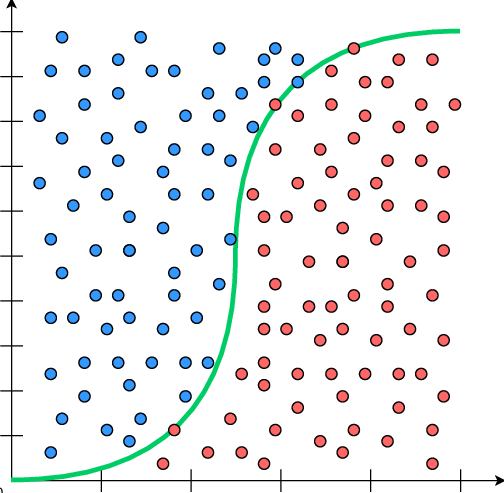

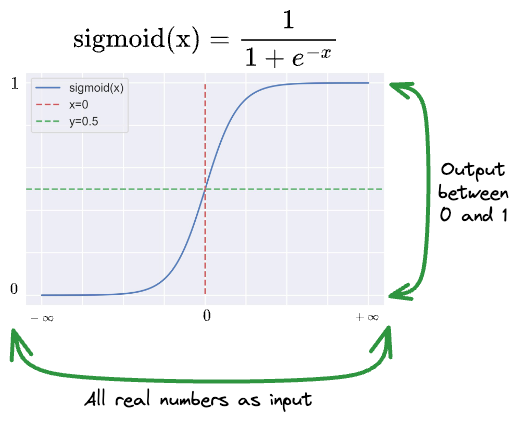

In [112]:
model = LogisticRegression(max_iter=200)
model.fit(x_train, y_train)

LogisticRegression(max_iter=200)

In [113]:
y_pred = model.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy - {accuracy:.2f}\n')
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=data.species.unique()))

Accuracy - 0.93


Classification Report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00         8
  versicolor       0.90      0.90      0.90        10
   virginica       0.92      0.92      0.92        12

    accuracy                           0.93        30
   macro avg       0.94      0.94      0.94        30
weighted avg       0.93      0.93      0.93        30



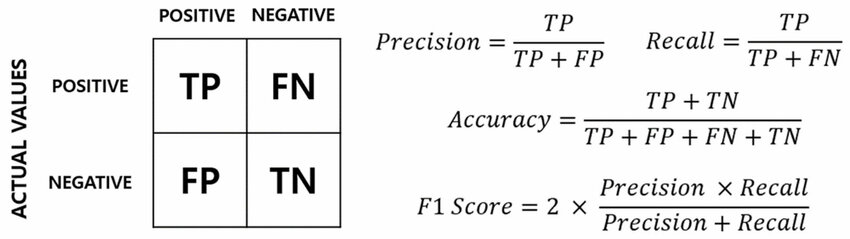

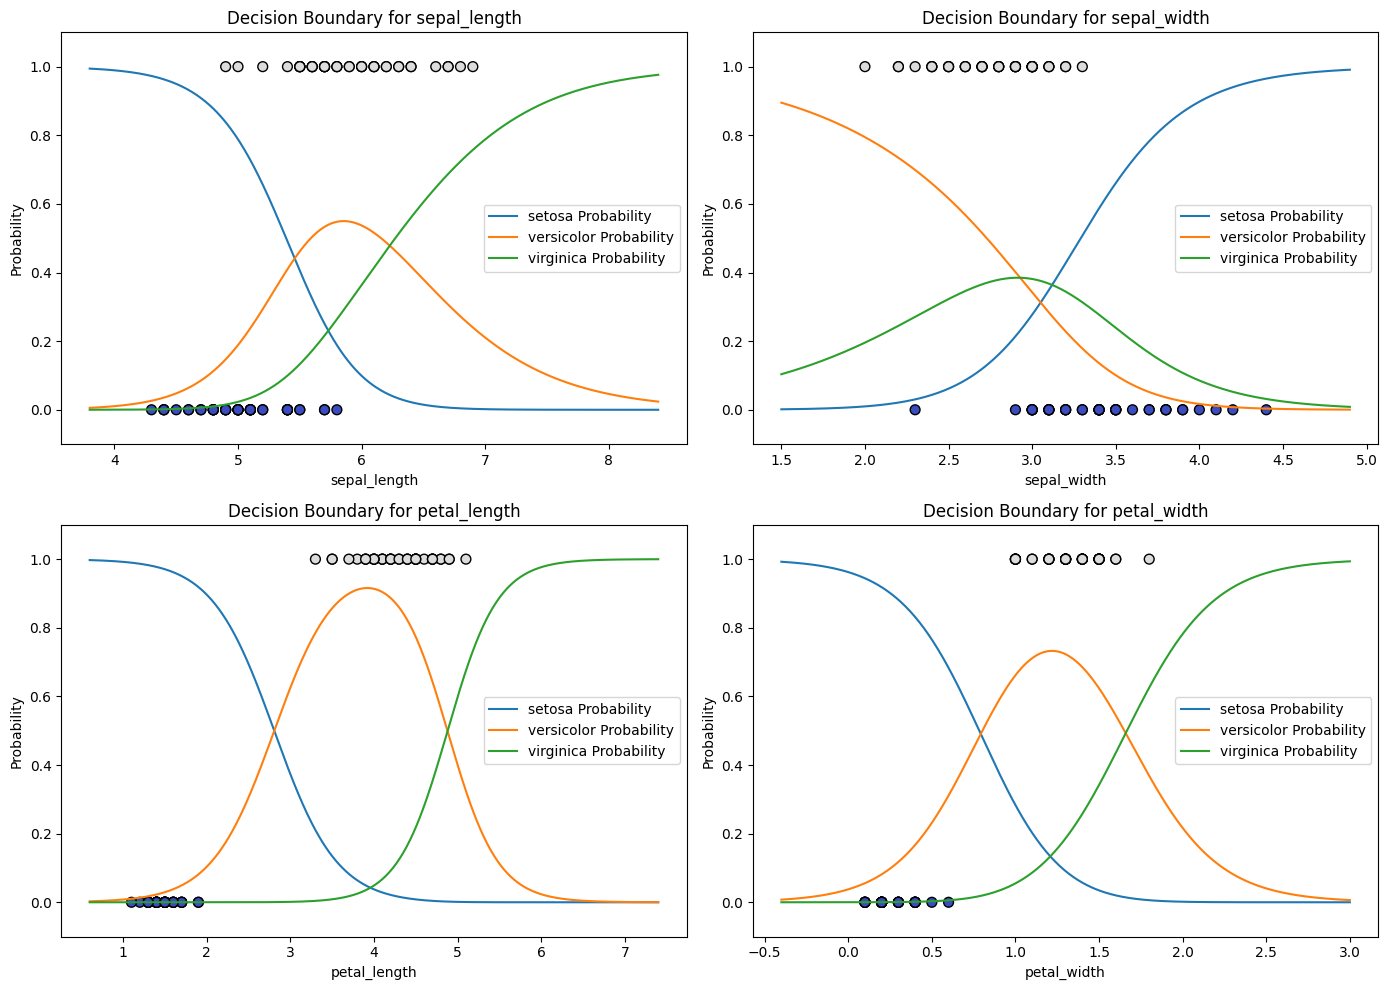

In [114]:
species_to_int = {'setosa': 0, 'versicolor': 1, 'virginica': 2}
y_mapped = y.map(species_to_int)
# Plot decision boundaries for each feature
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
axes = axes.ravel()

for i, feature in enumerate(features):
    # Train a logistic regression model using only one feature
    X_train_feature = x_train[[feature]]
    model = LogisticRegression(max_iter=200)
    model.fit(X_train_feature, y_train)

    # Create a range of values for the feature to visualize decision boundaries
    x_min, x_max = X_train_feature[feature].min() - 0.5, X_train_feature[feature].max() + 0.5
    x_values = pd.DataFrame(np.linspace(x_min, x_max, 500), columns=[feature])

    # Predict probabilities across the feature range
    y_prob = model.predict_proba(x_values)

    # Plot the feature vs. probability for each class
    for j, class_label in enumerate(model.classes_):
        axes[i].plot(x_values, y_prob[:, j], label=f'{class_label} Probability')

    # Scatter plot of the actual data points
    scatter = axes[i].scatter(X_train_feature, y_train.map(species_to_int),
                              c=y_train.map(species_to_int), cmap='coolwarm', edgecolor='k', s=50)
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel("Probability")
    axes[i].set_ylim(-0.1, 1.1)  # Set y-axis limits to show probability range properly
    axes[i].set_title(f'Decision Boundary for {feature}')
    axes[i].legend()

plt.tight_layout()
plt.show()

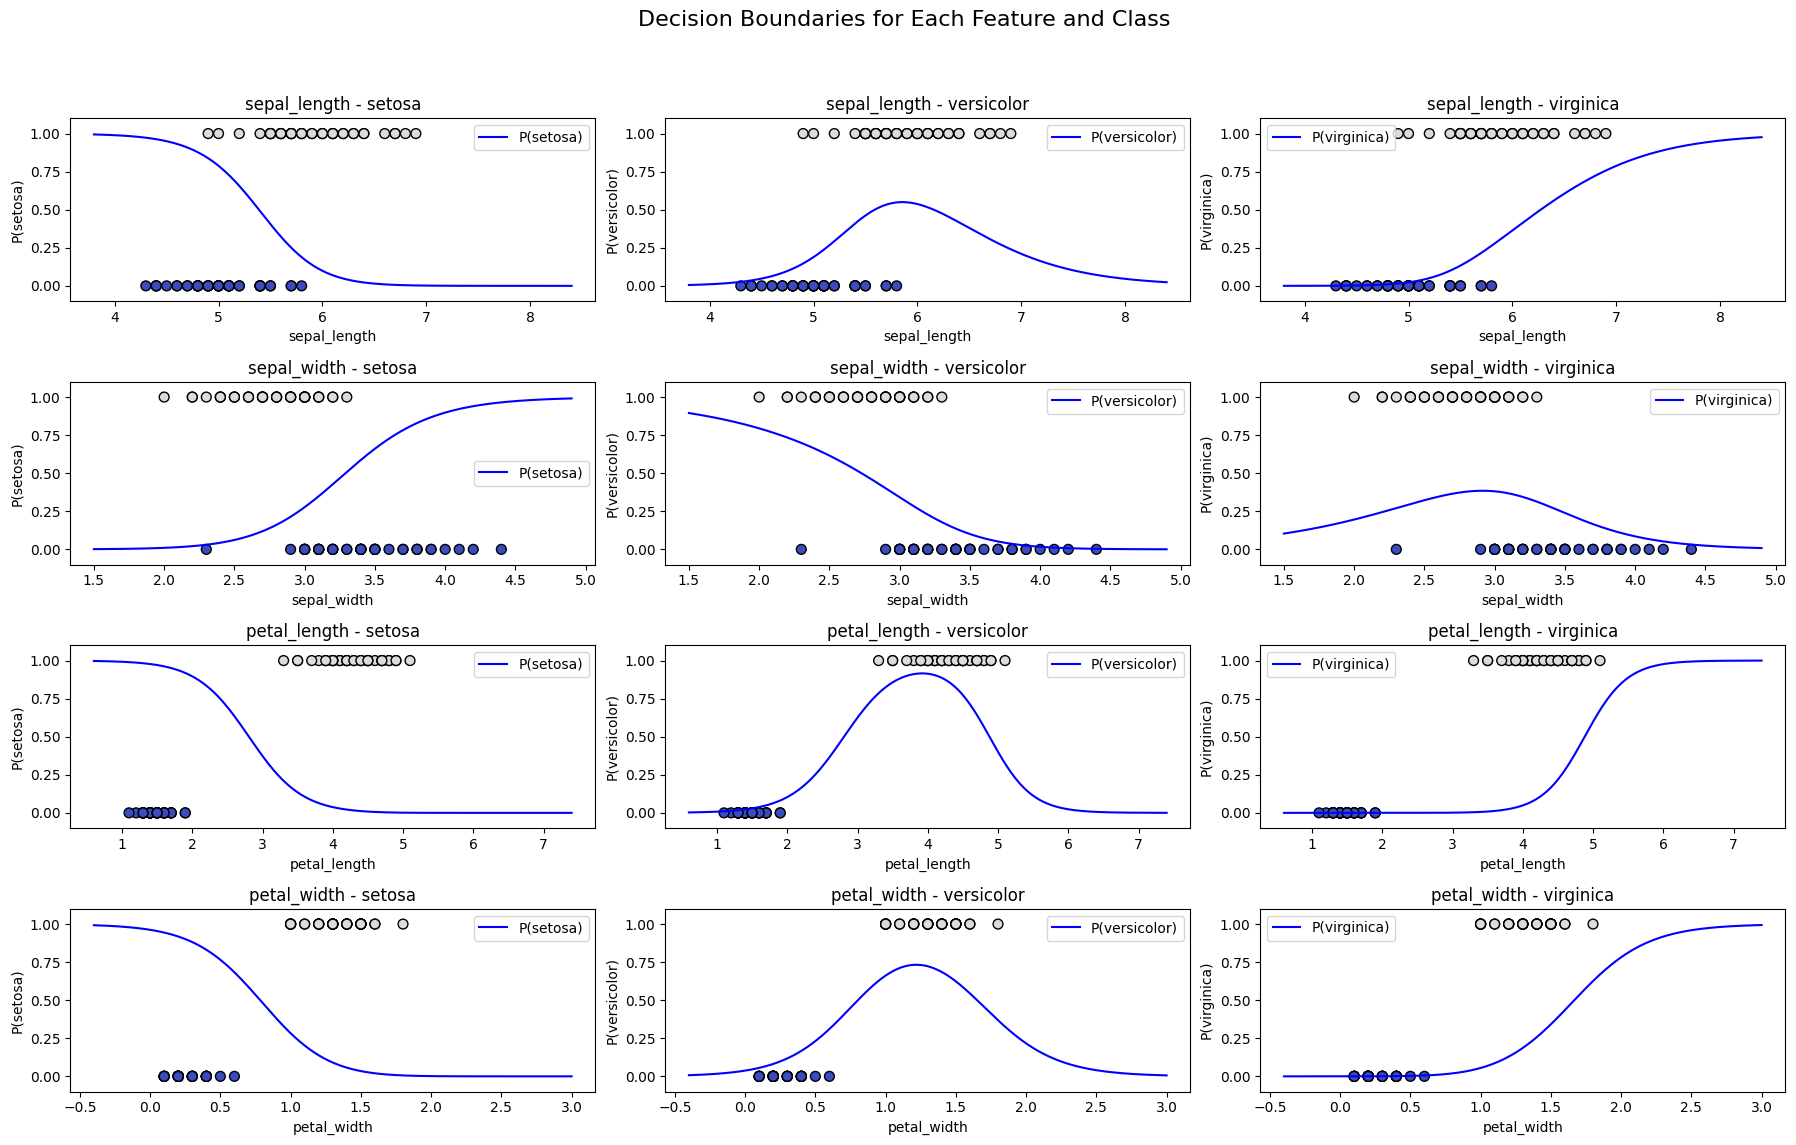

In [115]:
class_labels = y.unique()  # Get unique class labels

# Plot decision boundaries for each feature and each class separately
fig, axes = plt.subplots(len(features), len(class_labels), figsize=(18, 12))
fig.suptitle('Decision Boundaries for Each Feature and Class', fontsize=16)

for i, feature in enumerate(features):
    X_train_feature = x_train[[feature]]
    model = LogisticRegression(max_iter=200)
    model.fit(X_train_feature, y_train)

    # Create a range of values for the feature to visualize decision boundaries
    x_min, x_max = X_train_feature[feature].min() - 0.5, X_train_feature[feature].max() + 0.5
    x_values = pd.DataFrame(np.linspace(x_min, x_max, 500), columns=[feature])

    # Predict probabilities across the feature range
    y_prob = model.predict_proba(x_values)

    for j, class_label in enumerate(model.classes_):
        # Plot the probability curve for the current class
        ax = axes[i, j]
        ax.plot(x_values, y_prob[:, j], color='blue', label=f'P({class_label})')

        # Scatter plot of the actual data points, color-coded by class
        scatter = ax.scatter(X_train_feature, y_train.map(species_to_int),
                             c=y_train.map(species_to_int), cmap='coolwarm', edgecolor='k', s=50)
        
        ax.set_xlabel(feature)
        ax.set_ylabel(f'P({class_label})')
        ax.set_ylim(-0.1, 1.1)  # Set y-axis limits for probability range
        ax.set_title(f'{feature} - {class_label}')
        ax.legend()

plt.tight_layout(rect=[0, 0.03, 1, 0.95])  # Adjust layout to fit titles
plt.show()

# NOW - WE GO DEEP
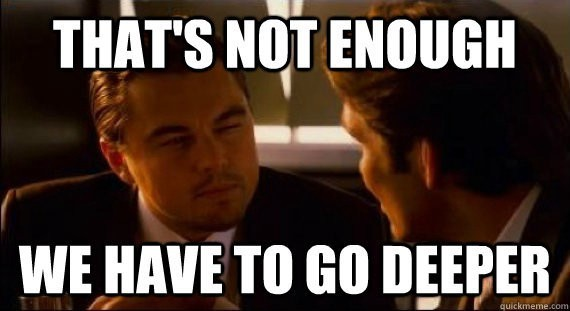

### Look Mommy it's a Neuron!!
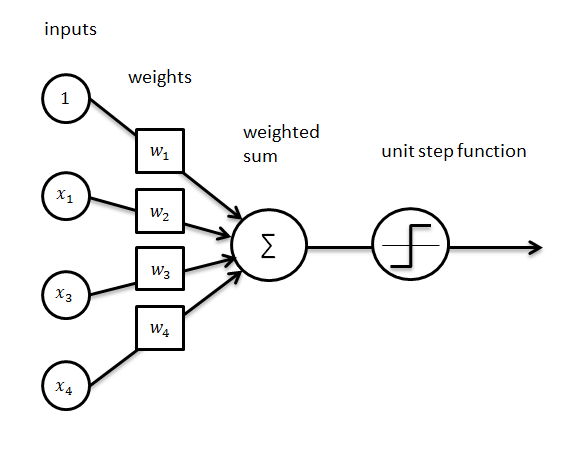

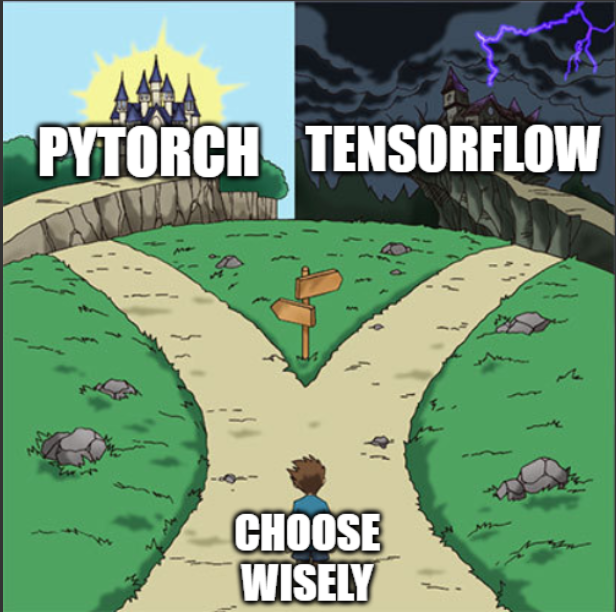


In [116]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

In [117]:
# Create a mapping dictionary for species to integers
species_to_int = {'setosa': 0, 'versicolor': 1, 'virginica': 2}

# Convert to np arrays
x_train_np = np.array(x_train) 
x_test_np = np.array(x_test)

# Encode the training and test labels using the mapping dictionary
y_train_encoded = np.array([species_to_int[species] for species in y_train])  # Encode training labels to integers
y_test_encoded = np.array([species_to_int[species] for species in y_test])    # Encode test labels to integers

# Convert the training and test data to PyTorch tensors
X_train_tensor = torch.tensor(x_train_np, dtype=torch.float32)  # Correcting the variable name from x_train to X_train
y_train_tensor = torch.tensor(y_train_encoded, dtype=torch.long)
X_test_tensor = torch.tensor(x_test_np, dtype=torch.float32)    # Correcting the variable name from x_test to X_test
y_test_tensor = torch.tensor(y_test_encoded, dtype=torch.long)


In [222]:
class Neuron(nn.Module):
    def __init__(self, in_features=4, out_features=3):
        super(Neuron, self).__init__()
        self.neuron = nn.Linear(in_features, out_features)
    
    def forward(self, x):
        return self.neuron(x)

In [223]:
## Hyper Parameters
lr = 0.03
epochs = 350

In [224]:
print(X_train_tensor[:5])
print(y_train_tensor[:5].view(5,1))

tensor([[5.7000, 2.8000, 4.1000, 1.3000],
        [4.9000, 3.1000, 1.5000, 0.1000],
        [5.0000, 3.3000, 1.4000, 0.2000],
        [5.7000, 3.8000, 1.7000, 0.3000],
        [5.1000, 3.8000, 1.5000, 0.3000]])
tensor([[1],
        [0],
        [0],
        [0],
        [0]])


In [235]:
model_torch = Neuron()
loss = nn.CrossEntropyLoss()
optimizer = optim.Adam(model_torch.parameters(), lr=lr)

In [236]:
random_input = torch.tensor([1.0, 0.5, 0.7, 0.9])
output = model_torch(random_input)
print(output)
species_output = torch.argmax(output)
print(f"\n{species_to_int} \n\t predicted class - > {species_output}")


tensor([ 0.9108, -0.2356, -0.6165], grad_fn=<ViewBackward0>)

{'setosa': 0, 'versicolor': 1, 'virginica': 2} 
	 predicted class - > 0


In [237]:
# Training Loop
model_torch.train()
for epoch in range(epochs):
    outputs = model_torch(X_train_tensor)
    loss = loss_fn(outputs, y_train_tensor)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if (epoch + 1) % 50 == 0:
        print(f'Epoch [{epoch + 1}/{epochs}], Loss: {loss.item():.4f}')

Epoch [50/350], Loss: 0.5439
Epoch [100/350], Loss: 0.3963
Epoch [150/350], Loss: 0.3273
Epoch [200/350], Loss: 0.2784
Epoch [250/350], Loss: 0.2412
Epoch [300/350], Loss: 0.2123
Epoch [350/350], Loss: 0.1894


In [239]:
# Evaluate the model on test data
model_torch.eval()
with torch.no_grad():
    y_pred = model_torch(X_test_tensor)
    _, predicted_classes = torch.max(y_pred, 1)
    accuracy = accuracy_score(y_test_tensor.numpy(), predicted_classes.numpy())
    print(f'Test Accuracy: {accuracy:.2f}')

Test Accuracy: 0.97


In [193]:
# After the training loop
with torch.no_grad():
    y_pred = model(X_test_tensor)
    _, predicted_classes = torch.max(y_pred, 1)

# Convert tensors to numpy arrays
y_test_np = y_test_tensor.numpy()
predicted_classes_np = predicted_classes.numpy()

# Calculate F1 Score
f1 = f1_score(y_test_np, predicted_classes_np, average='weighted')
print(f'F1 Score: {f1:.4f}')

# Generate classification report
report = classification_report(y_test_np, predicted_classes_np, target_names=['setosa', 'versicolor', 'virginica'])
print("Classification Report:\n", report)


F1 Score: 0.9667
Classification Report:
               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00         8
  versicolor       0.91      1.00      0.95        10
   virginica       1.00      0.92      0.96        12

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30



# TF 
Simple But Deadly

In [215]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
    layers.Input((4,)),
    layers.Dense(units=3, activation='softmax')  # 3 output units for 3 classes
])

model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.03),
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])

model.summary()

Model: "sequential_18"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_22 (Dense)                │ (None, 3)              │            15 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 15 (60.00 B)

 Trainable params: 15 (60.00 B)

 Non-trainable params: 0 (0.00 B)

In [217]:
model.fit(x_test, y_test_encoded, epochs=350, batch_size=)

Epoch 1/350
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 560ms/step - accuracy: 0.4667 - loss: 3.2360
Epoch 2/350
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.5667 - loss: 2.7496
Epoch 3/350
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.6000 - loss: 2.3117
Epoch 4/350
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.6000 - loss: 1.9153
Epoch 5/350
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.6000 - loss: 1.5449
Epoch 6/350
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.5667 - loss: 1.1987
Epoch 7/350
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.5000 - loss: 0.9023
Epoch 8/350
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.5667 - loss: 0.7051
Epoch 9/350
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.6667 - loss: 0.6463
Epoch 10/350
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.6667 - loss: 0.7036
Epoch 11/350
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.6667 - loss: 0.8099
Epoch 12/350
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.6667 - l

In [218]:
y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1) 

report = classification_report(y_test_encoded, y_pred_classes, target_names=['setosa', 'versicolor', 'virginica'])
print(report)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00         8
  versicolor       1.00      1.00      1.00        10
   virginica       1.00      1.00      1.00        12

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

